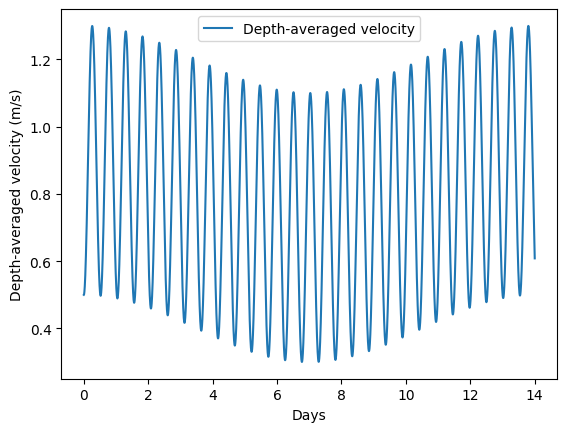

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#----------------------------------------------------- 8a) start -----------------------------------------------------------------------------------------
# Define the parameters
Vspring = 0.7
Vneap = 0.5
Voffset = 0.4
T_ef = 12.5 / 24
T_sn = 14

time_points = np.linspace(0, T_sn, num=10000)
a_ef = (Vspring + Vneap) / 2 - Voffset
a_sn = (Vspring - Vneap) / 2
T_ef = 12.5 / 24
T_sn = 14

Vc = Voffset + a_ef * (2 * np.abs(np.cos(2 * np.pi * (time_points / T_ef)) - 1)) + a_sn * np.cos(2 * np.pi * time_points / T_sn)

# Plot the time series
plt.figure()
plt.plot(time_points, Vc, label='Depth-averaged velocity')
plt.xlabel('Days')
plt.ylabel('Depth-averaged velocity (m/s)')
plt.legend()
plt.show()
#----------------------------------------------------- 8a) END  -----------------------------------------------------------------------------------------

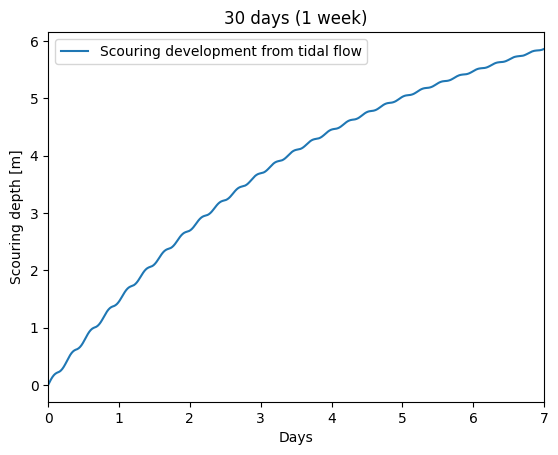

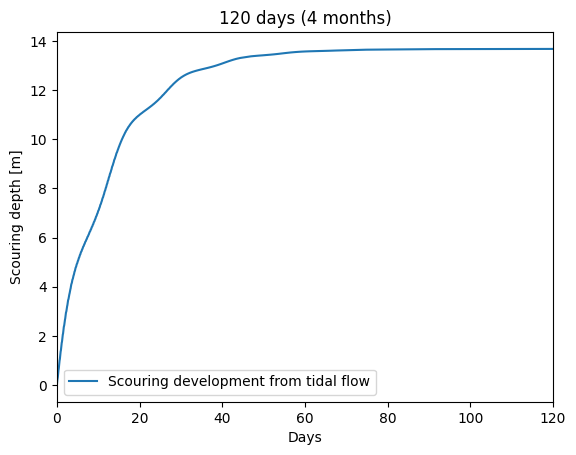

In [10]:
#---------------------------------------------------  8b) START -----------------------------------------------------------------------------------------

#-------------------------------------------------- CONSTANTS START ------------------------------------
# Monopile foundation
D = 9.0  # [m] foundation diameter

# Bed conditions
h = 30           # [m] water depth around monopile
d50 = 0.2        # [mm] grain size
d84 = 2.3 * d50  # [mm] grain size
sigma_g = d84 / d50
rho_s = 2650     # [kg/m3] sand density
rho_w = 1026     # [kg/m3] sea-water density
l = 1.0

# Summer and design conditions
V_s = 0.7   # [m/s]
V_d = 1.1   # [m/s]
H_ss = 3.5  # [m]
H_sd = 8.8  # [m]
T_ps = 8.0  # [s]
T_pd = 14.0  # [s]
g = 9.81
s = rho_s / rho_w
kappa = 0.4  # Von Karman constant [-]
ks = 2.5 * d50  # Nikuradse’s bed roughness [m]
g = 9.81  # Gravity in Denmark [m/s2]
S_eq = 13.68
#-------------------------------------------------CONSTANTS END ----------------------------------------

# Initialize Si for both 30 days and 120 days as NumPy arrays
t_7days = np.arange(0, 7.01, 0.01)
t_120days = np.arange(0, 120.01, 0.01)
Si_7days = np.zeros(len(t_7days))
Si_120days = np.zeros(len(t_120days))

# Initialize Si with the initial value for both scenarios
Si_7 = 0
Si_120 = 0

# Loop for the first 30 days
for i in range(1, len(t_7days)):
    Dav = Voffset + a_ef * (2 * np.abs(np.cos(2 * np.pi * ((i - 1) * l / 100) / T_ef)) * l) + a_sn * np.cos(2 * np.pi * ((i - 1) * l / 100) / T_sn)
    Ufc = Dav / (6 + 2 * s * np.log(h / ks))
    thetacur = (Ufc ** 2) / (g * s * l * d50)
    T_adimensional = (1 / 375) * (h/D)**0.75 * thetacur**(-1.5)
    T = D ** 2 / np.sqrt(g*(s-1)* d50**3) * T_adimensional
    Vs_7 = (S_eq - Si_7) / T
    Si_7 = Si_7 + Vs_7 * (3600 * 24) / 100
    Si_7days[i] = Si_7

# Loop for the next 120 days
for i in range(1, len(t_120days)):
    Dav = Voffset + a_ef * (2 * np.abs(np.cos(2 * np.pi * ((i - 1) * l / 100) / T_ef)) * l) + a_sn * np.cos(2 * np.pi * ((i - 1) * l / 100) / T_sn)
    Ufc = Dav / (6 + 2 * s * np.log(h / ks))
    thetacur = (Ufc ** 2) / (g * s * l * d50)
    T_adimensional = (1 / 375) * (h/D)**0.75 * thetacur**(-1.5)
    T = D ** 2 / np.sqrt(g*(s-1)* d50**3) * T_adimensional
    Vs_120 = (S_eq - Si_120) / T
    Si_120 = Si_120 + Vs_120 * (3600 * 24) / 100
    Si_120days[i] = Si_120

#--------------------------------------------------- PLOTS START -----------------------------------------------------------------------------------------

# Plot results for 30 days
plt.figure()
plt.plot(t_7days, Si_7days[:len(t_7days)], label='Scouring development from tidal flow')
plt.title('30 days (1 week)')
plt.xlabel('Days')
plt.ylabel('Scouring depth [m]')
plt.xlim([0, 7])  # Set x-axis limits
plt.legend(loc='best')

# Plot results for 120 days
plt.figure()
plt.plot(t_120days, Si_120days[:len(t_120days)], label='Scouring development from tidal flow')
plt.title('120 days (4 months)')
plt.xlabel('Days')
plt.ylabel('Scouring depth [m]')
plt.xlim([0, 120])  # Set x-axis limits
plt.legend(loc='best')
plt.show()

#--------------------------------------------------- PLOTS END -----------------------------------------------------------------------------------------

#----------------------------------------------------- 8b) END -----------------------------------------------------------------------------------------

